In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import torch
import xarray as xr
import pandas as pd
import os
import datetime
import seaborn as sns

import cartopy
import cartopy.crs as ccrs
from pyresample import load_area, geometry

import quantnn

In [2]:
f = open('../path_to_data.txt', "r")
path_to_dataset = os.path.join(f.readline().rstrip("\n"))
f.close() 

In [3]:
real = pd.read_pickle(os.path.join(path_to_dataset,'real_rain_gauge_data', 'rain_gauges.pckl'))

In [4]:
pred = xr.open_dataset(os.path.join(path_to_dataset, 'aggregated_rain_gauge_preds', 'pred_c.nc'))

391
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
739    0.0
740    0.0
741    0.0
742    0.0
743    0.0
Name: 391, Length: 744, dtype: float64


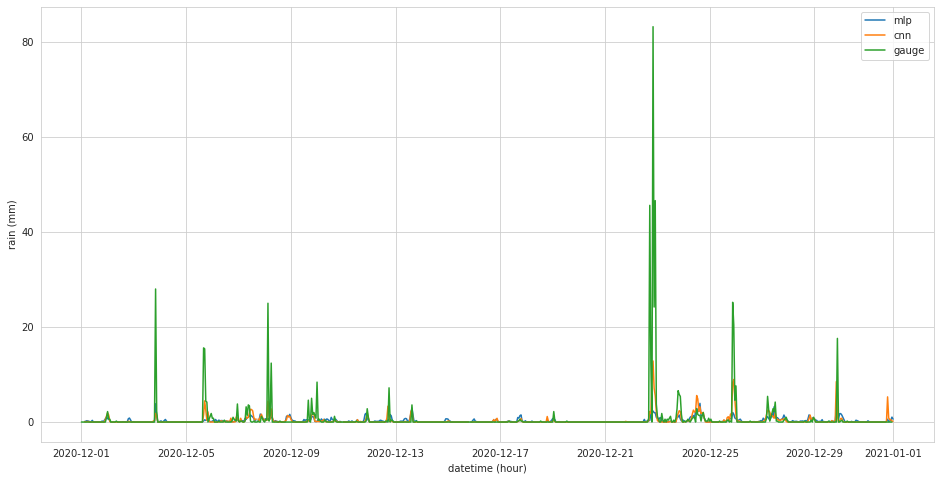

In [90]:
sns.set_style('whitegrid')
ind = 391 #308#4#np.random.randint(609)
print(ind)
v = pred.mlp_posterior_mean[:, ind].values
w = pred.xception_posterior_mean[:, ind].values
u = pred['xception_Q0.95'][:, ind].values
q = pred['xception_Q0.99'][:, ind].values

fig, ax = plt.subplots(figsize=(16,8))
plt.plot(pred.time, v, label='mlp')
plt.plot(pred.time, w, label='cnn')
#plt.plot(combined.time, u, label='cnn 95')
print(real[str(ind)])
realt = [time.to_pydatetime() for time in real['timestamp']]
#print(combined.time)
#print(realt[:23])
plt.plot(realt, real[str(ind)], label='gauge')
ax.set_ylabel('rain (mm)')
ax.set_xlabel('datetime (hour)')
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(pred.time, v, label='mlp')
plt.plot(pred.time, w, label='cnn')
#plt.plot(combined.time, u, label='cnn 95')
print(real[str(ind)])
realt = [time.to_pydatetime() for time in real['timestamp']]
#print(combined.time)
#print(realt[:23])
plt.plot(realt, real[str(ind)], label='gauge')
ax.set_ylabel('rain (mm)')
ax.set_xlabel('datetime (hour)')
ax.legend()

In [70]:
str(pred.time.values[0])[:-13].replace("T",".")

'2020-12-01.01:00'

In [74]:
predt = [datetime.datetime.strptime(str(v)[:-13].replace("T","."), "%Y-%m-%d.%H:%M") for v in pred.time.values] 

In [86]:
predt[:-1] == realt[1:]

True

In [ ]:
real[]

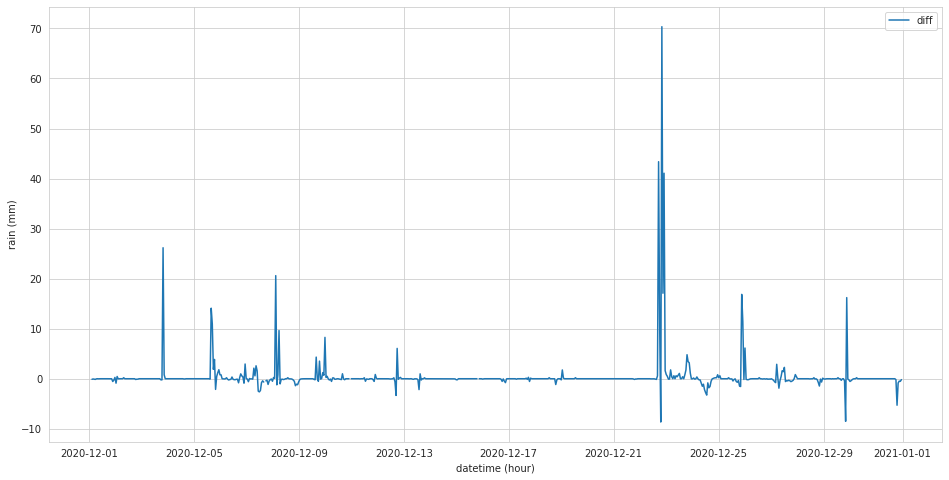

In [88]:
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(predt[:-1], real[str(ind)][1:]-w[:-1], label='diff')
ax.set_ylabel('rain (mm)')
ax.set_xlabel('datetime (hour)')
ax.legend()

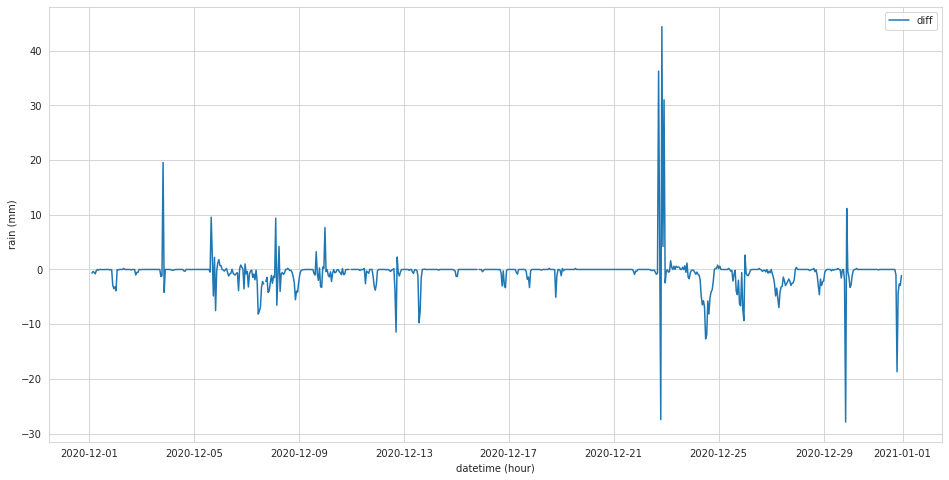

In [89]:
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(predt[:-1], real[str(ind)][1:]-u[:-1], label='diff')
ax.set_ylabel('rain (mm)')
ax.set_xlabel('datetime (hour)')
ax.legend()

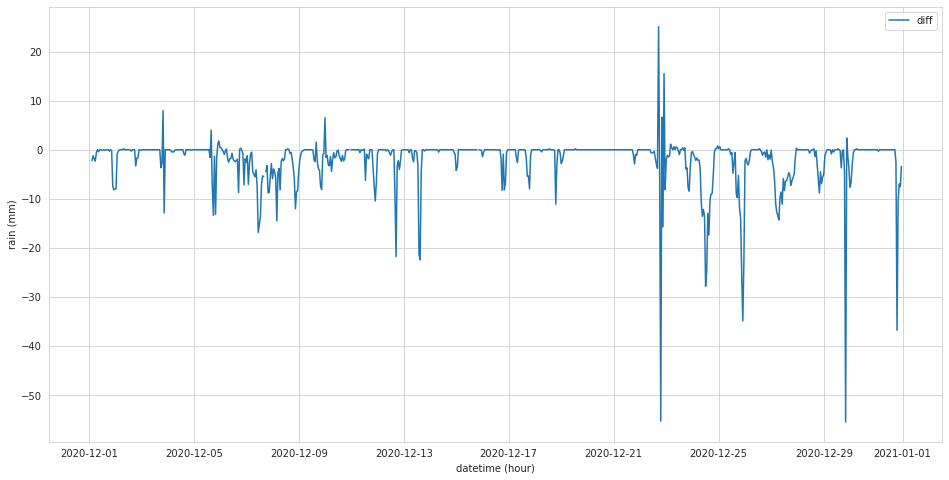

In [91]:
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(predt[:-1], real[str(ind)][1:]-q[:-1], label='diff')
ax.set_ylabel('rain (mm)')
ax.set_xlabel('datetime (hour)')
ax.legend()